In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline
import cartopy
import cartopy.crs as ccrs
from cartopy import config
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy import feature as cfeature
from cartopy.feature import NaturalEarthFeature, LAND, COASTLINE, OCEAN, LAKES, BORDERS
import matplotlib.ticker as mticker

import sympy as sym
from sympy import symbols, Eq

## PSV Data analysis comparison: 16 Degree Bin Location Grouping and Residual from $I_{GAD}$ Plots

### Location Grouping by 10 degree latitude bins for a total of 16 data groups

The PSV data will be sorted to include Age values within 0 to 10 MA and Model VGP Latitudes greater than or equal to 0 degrees. Normal Polarity of the field is indicated by Model VGP greater than 0. This is to compare to the PSV Global Dataset for 0 to 10 Ma Time Averaged Field Variations by Cromwell et. al., to replicate the Inclination Anomaly results to then apply to a 0 to 5 MA dataset.

The geomagnetic axial dipole, GAD, is a model for the magnetic field dipole at the center of Earth. Due to complicated Earth dynamics, variations from GAD can be measured and it can be shown that Earth's geomagnetic field is not exactly depicted by GAD (Tauxe, 2018). 

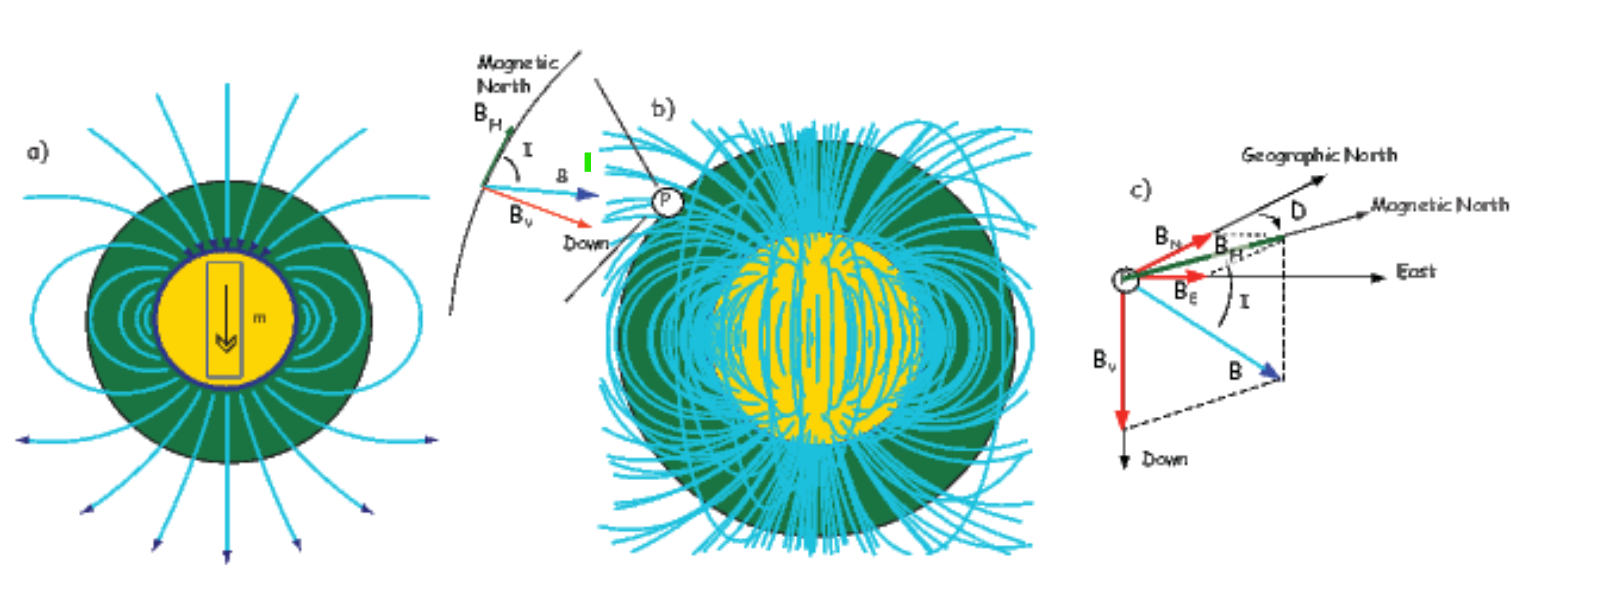

In [56]:
Image(filename='magnetic_field_compenents_tauxe.png', width=800, height=1400)

Fig. 1. Above is the magnetic flux produced by a geocentric axial dipole. Bn represents the geographic North, referred to in this notebook as $x_{2}$, Be represents the geographic East, referred to here as $y_{2}$, and $B_{v}$ represents geographic Down and will be referred to as $z_{2}$. Magnetic north is represented by $B_{h}$. The geomagnetic field vector B, makes an angle to the horizontal plane called inclination, I. Inclination increases downward and ranges from -90 straight upwards, and +90 straight down. The angle between $B_{h}$ and $B_{n}$, or the angle between the horizontal components is the Declination, D. Declination increases from $B_{n}$ to the right, ranging from 0 to 360 (Tauxe, 2018).

To first import the data, the PSV10 data excel file is first adjusted to only include columns with numeric values and is then converted to a csv file so that it can be read into by pandas. Data with AGE values within 10 MA and Model VGP latitudes greater than 0 degrees are sorted by increasing Latitude. It is noted that model VGP Lat greater than 45 degrees indicates normal polarity. Relevant columns are called to the Dataframe 'psvnew' and will be used to calculate average inclination, declination, latitude, longitude, and residual values. 

In [60]:
pd.set_option('display.max_rows', 10)            # set dataframe display
 
psv = pd.read_csv('..\data\PSV0.csv')            # import csv file as pandas dataframe (df)

psv.head()

,age,age_pm,age_high,age_low,site_lat,site_lon,model_lat,model_lon,nn,k,dec,inc,model_vgp_lat,model_vgp_lon,site_ID
0,-0.024000,0.276,999.000000,999.000000,-39.30000,175.60000,-39.291517,175.600832,5,382.8125,15.8,-50.6,74.9,238.7,2132
1,0.000000,999.000,999.000000,999.000000,-7.59000,110.42600,-7.590000,110.426000,7,462.5000,354.9,-33.4,78.2,314.9,512
2,0.000000,0.020,999.000000,999.000000,19.12350,97.53770,19.123500,97.537700,9,233.7000,9.6,27.8,79.8,211.5,1313
3,0.000000,0.050,999.000000,999.000000,4.93361,-75.46733,4.933610,284.532670,10,193.0000,6.0,7.0,83.9,27.7,1929
4,0.000063,999.000,0.000066,0.000059,19.48000,257.78000,19.480005,257.780005,6,238.0000,10.7,37.8,79.8,336.2,637


In [61]:
psv_10 = psv.loc[(psv.age <= 10.00) & (psv.model_vgp_lat >= 0)] # sort the date for age less than or equal to 10 MA and Model VGP lat > or = 0

psvnew = pd.DataFrame()                          # create empty dataframe

# adding columns from imported 'psv' df to new psvnew df and re-naming them 
psvnew['Model_lat'] = psv_10.model_lat              # latitude
psvnew['Model_lon'] = psv_10.model_lon              # longitude
psvnew['AGE'] = psv_10.age                          # estimated age
psvnew['AGE_pm'] = psv_10.age_pm                   
psvnew['AGE_high'] = psv_10.age_high
psvnew['AGE_low'] = psv_10.age_low
psvnew['Dec'] = psv_10.dec                          # declination
psvnew['Inc'] = psv_10.inc                          # inclination
psvnew['K'] = psv_10.k                              # precision parameter

psvnew.reset_index(inplace=True, drop=True) # reset index 

psvnew

,Model_lat,Model_lon,AGE,AGE_pm,AGE_high,AGE_low,Dec,Inc,K
0,-39.291517,175.600832,-0.024000,0.276,999.000000,999.000000,15.8,-50.6,382.8125
1,-7.590000,110.426000,0.000000,999.000,999.000000,999.000000,354.9,-33.4,462.5000
2,19.123500,97.537700,0.000000,0.020,999.000000,999.000000,9.6,27.8,233.7000
3,4.933610,284.532670,0.000000,0.050,999.000000,999.000000,6.0,7.0,193.0000
4,19.480005,257.780005,0.000063,999.000,0.000066,0.000059,10.7,37.8,238.0000
...,...,...,...,...,...,...,...,...,...
1748,-4.852007,327.996457,10.000000,999.000,12.000000,8.000000,352.5,-30.8,182.0000
1749,-4.835036,328.006720,10.000000,999.000,12.000000,8.000000,4.3,-19.3,478.0000
1750,-4.863818,327.965482,10.000000,999.000,12.000000,8.000000,13.3,-29.5,376.0000
1751,-4.856182,327.987734,10.000000,999.000,12.000000,8.000000,57.0,-31.0,119.0000


In [62]:
psvnewn = psvnew[:] #copy table to a new one as to not revert previous setting on table

In [63]:
psvnewn = psvnewn.sort_values(by='Model_lat') # sort by increasing Latitude values
psvnewn.reset_index(inplace=True)            # reset index column
psvnewn

,index,Model_lat,Model_lon,AGE,AGE_pm,AGE_high,AGE_low,Dec,Inc,K
0,369,-78.381465,164.181845,0.084,0.004,999.0,999.0,263.1,-85.9,188.0
1,468,-78.377810,164.229724,0.120,0.010,999.0,999.0,349.1,-83.0,149.2
2,467,-78.377808,164.189766,0.120,0.010,999.0,999.0,293.6,-84.0,273.0
3,588,-78.361547,164.106279,0.280,0.010,999.0,999.0,270.9,-78.1,114.5
4,512,-78.291753,164.738929,0.180,0.040,999.0,999.0,12.0,-78.7,395.5
...,...,...,...,...,...,...,...,...,...,...
1748,1723,78.188711,9.636755,9.000,999.000,999.0,999.0,348.9,75.5,386.0
1749,1724,78.355432,9.328285,9.000,999.000,999.0,999.0,331.2,79.8,608.0
1750,807,78.681916,11.216281,0.500,999.000,1.0,0.0,355.5,54.3,1413.0
1751,806,78.860327,10.923642,0.500,999.000,1.0,0.0,85.0,77.8,915.0


This function returns a bin label within -8 to 8 corresponding to the specified 10 degree range. Based on how this criteria is applied to the Latitude column, the "bins" column is created. 

In [64]:
pd.set_option('display.max_rows', 10)

df = psvnewn.iloc[:]             # copy table to a new one as to not revert previous setting on table

# in a new column called bins, assign labels -8 to 8 to each data point corresponding to -80 to 80 degrees by 10 degree incriments
df['bins'] = pd.cut(x=df['Model_lat'], bins=[-80.0, -70.0, -60.0, -50.0, -40.0, -30.0, 
                                            -20.0, -10.0, 0.0, 10.0, 20.0, 30.0, 40.0, 50.0, 
                                            60.0, 70.0, 80.0], 
                   labels=[-8, -7, -6, -5, -4, -3, -2, -1, 1, 2, 3, 4, 5, 6, 7, 8],
                   right=False)
del df['index']                  # delete extra index the gets created due to pd.cut
df

,Model_lat,Model_lon,AGE,AGE_pm,AGE_high,AGE_low,Dec,Inc,K,bins
0,-78.381465,164.181845,0.084,0.004,999.0,999.0,263.1,-85.9,188.0,-8
1,-78.377810,164.229724,0.120,0.010,999.0,999.0,349.1,-83.0,149.2,-8
2,-78.377808,164.189766,0.120,0.010,999.0,999.0,293.6,-84.0,273.0,-8
3,-78.361547,164.106279,0.280,0.010,999.0,999.0,270.9,-78.1,114.5,-8
4,-78.291753,164.738929,0.180,0.040,999.0,999.0,12.0,-78.7,395.5,-8
...,...,...,...,...,...,...,...,...,...,...
1748,78.188711,9.636755,9.000,999.000,999.0,999.0,348.9,75.5,386.0,8
1749,78.355432,9.328285,9.000,999.000,999.0,999.0,331.2,79.8,608.0,8
1750,78.681916,11.216281,0.500,999.000,1.0,0.0,355.5,54.3,1413.0,8
1751,78.860327,10.923642,0.500,999.000,1.0,0.0,85.0,77.8,915.0,8


This attaches each group bin to its own dataframe. The array is made up of the lengths of each of the bins. In this format, it can be compared to the groups in the Cromwell paper to ensure that this grouping method returns the same number of groups achieved in the paper. 

In [65]:
pd.set_option('display.max_rows', 10)

# create new df 'psv_#' based off of the column value for bins in df 'df'
psv_n8 = df[(df.bins == -8)]
psv_n7 = df[(df.bins == -7)] 
psv_n6 = df[(df.bins == -6)]
psv_n5 = df[(df.bins == -5)]
psv_n4 = df[(df.bins == -4)]
psv_n3 = df[(df.bins == -3)]
psv_n2 = df[(df.bins == -2)]
psv_n1 = df[(df.bins == -1)]
psv_1 = df[(df.bins == 1)]
psv_2 = df[(df.bins == 2)]
psv_3 = df[(df.bins == 3)]
psv_4 = df[(df.bins == 4)]
psv_5 = df[(df.bins == 5)]
psv_6 = df[(df.bins == 6)]
psv_7 = df[(df.bins == 7)]
psv_8 = df[(df.bins == 8)]

# creates an array with each value representing the length of the group for that bins value
arr = np.array([len(psv_n8), len(psv_n7), len(psv_n6), len(psv_n5), len(psv_n4), len(psv_n3), len(psv_n2), len(psv_n1),
      len(psv_1), len(psv_2), len(psv_3), len(psv_4), len(psv_5), len(psv_6), len(psv_7), len(psv_8)])
sum(arr)                     # sum over the array to ensure all the data points are collected 

print(arr, 'sum:', sum(arr))

[ 77  35  24  35  96  88  77 169  86 184 323 154 198 119  57  31] sum: 1753


This shows that the group lengths are the same (both having 1753 data points)

In [66]:
# group amounts from Cromwell et al. Fig. 8, b)
papergroups = [77, 35, 24, 35, 96, 88, 77, 169, 86, 184, 323, 154, 198, 119, 57, 31]
np.sum(papergroups)

1753

This array subtracts the two arrays containing group amounts and returns a zero matrix that indicates the groups are the same in length. 

In [67]:
papergroups - arr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [68]:
pd.set_option('display.max_rows', 10)
df       # print df to show there are 1753 data points

,Model_lat,Model_lon,AGE,AGE_pm,AGE_high,AGE_low,Dec,Inc,K,bins
0,-78.381465,164.181845,0.084,0.004,999.0,999.0,263.1,-85.9,188.0,-8
1,-78.377810,164.229724,0.120,0.010,999.0,999.0,349.1,-83.0,149.2,-8
2,-78.377808,164.189766,0.120,0.010,999.0,999.0,293.6,-84.0,273.0,-8
3,-78.361547,164.106279,0.280,0.010,999.0,999.0,270.9,-78.1,114.5,-8
4,-78.291753,164.738929,0.180,0.040,999.0,999.0,12.0,-78.7,395.5,-8
...,...,...,...,...,...,...,...,...,...,...
1748,78.188711,9.636755,9.000,999.000,999.0,999.0,348.9,75.5,386.0,8
1749,78.355432,9.328285,9.000,999.000,999.0,999.0,331.2,79.8,608.0,8
1750,78.681916,11.216281,0.500,999.000,1.0,0.0,355.5,54.3,1413.0,8
1751,78.860327,10.923642,0.500,999.000,1.0,0.0,85.0,77.8,915.0,8


This is the calculation for the individual Inclination Residuals in degrees, $I_{gad}$, and the standard deviation of the Inclination using the Fisher method, Istdv-Fisher. The difference between the collected inclincation and the calculated Igad is the individual Inclination anamoly, ΔI. The age uncertainty, AGE-unc, will be the difference between the AGE_high and AGE_low. 

$I_{gad}$ is the inclination expected from the GAD field and will be calculated using: 
$$tan(I_{gad}) = 2tan(λ)$$
$$I_{gad} = atan(2tan(λ))$$

In [69]:
df["Igad"] = np.degrees(np.arctan(2*np.tan(np.radians(df.Model_lat))))   # inputs latitude as radians into the tan function and outputs a value in degrees
df["Istdv_Fisher"] = 81/np.sqrt(np.abs(df["K"])) # inc stdv 

df["ΔI"] =  ((df["Inc"]) - df["Igad"])           # inclination anamoly in degrees
df["AGE_unc"] = df["AGE_high"] - df["AGE_low"]     # age uncertainty

In [70]:
pd.set_option('display.max_rows', 10)
df

,Model_lat,Model_lon,AGE,AGE_pm,AGE_high,AGE_low,Dec,Inc,K,bins,Igad,Istdv_Fisher,ΔI,AGE_unc
0,-78.381465,164.181845,0.084,0.004,999.0,999.0,263.1,-85.9,188.0,-8,-84.130394,5.907532,-1.769606,0.0
1,-78.377810,164.229724,0.120,0.010,999.0,999.0,349.1,-83.0,149.2,-8,-84.128509,6.631329,1.128509,0.0
2,-78.377808,164.189766,0.120,0.010,999.0,999.0,293.6,-84.0,273.0,-8,-84.128508,4.902343,0.128508,0.0
3,-78.361547,164.106279,0.280,0.010,999.0,999.0,270.9,-78.1,114.5,-8,-84.120122,7.569763,6.020122,0.0
4,-78.291753,164.738929,0.180,0.040,999.0,999.0,12.0,-78.7,395.5,-8,-84.084119,4.072975,5.384119,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1748,78.188711,9.636755,9.000,999.000,999.0,999.0,348.9,75.5,386.0,8,84.030942,4.122791,-8.530942,0.0
1749,78.355432,9.328285,9.000,999.000,999.0,999.0,331.2,79.8,608.0,8,84.116968,3.284984,-4.316968,0.0
1750,78.681916,11.216281,0.500,999.000,1.0,0.0,355.5,54.3,1413.0,8,84.285210,2.154835,-29.985210,1.0
1751,78.860327,10.923642,0.500,999.000,1.0,0.0,85.0,77.8,915.0,8,84.377027,2.677777,-6.577027,1.0


In order to average over the latitude and longitude for the groups, each will first be converted to their x,y,z coordinates.

In [71]:
latr = np.radians(df.Model_lat)                    # converts Lat and Long values from degrees into radians
longr = np.radians(df.Model_lon)

df['X']= np.cos(latr)*np.cos(longr)                # convert Lat and Long to cartesian X,Y,Z coordinates and creates X, Y, and Z columns 
df['Y']= np.cos(latr)*np.sin(longr)
df['Z']= np.sin(latr)
df

,Model_lat,Model_lon,AGE,AGE_pm,AGE_high,AGE_low,Dec,Inc,K,bins,Igad,Istdv_Fisher,ΔI,AGE_unc,X,Y,Z
0,-78.381465,164.181845,0.084,0.004,999.0,999.0,263.1,-85.9,188.0,-8,-84.130394,5.907532,-1.769606,0.0,-0.193768,0.054897,-0.979510
1,-78.377810,164.229724,0.120,0.010,999.0,999.0,349.1,-83.0,149.2,-8,-84.128509,6.631329,1.128509,0.0,-0.193874,0.054752,-0.979497
2,-78.377808,164.189766,0.120,0.010,999.0,999.0,293.6,-84.0,273.0,-8,-84.128508,4.902343,0.128508,0.0,-0.193836,0.054887,-0.979497
3,-78.361547,164.106279,0.280,0.010,999.0,999.0,270.9,-78.1,114.5,-8,-84.120122,7.569763,6.020122,0.0,-0.194023,0.055246,-0.979440
4,-78.291753,164.738929,0.180,0.040,999.0,999.0,12.0,-78.7,395.5,-8,-84.084119,4.072975,5.384119,0.0,-0.195772,0.053414,-0.979194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1748,78.188711,9.636755,9.000,999.000,999.0,999.0,348.9,75.5,386.0,8,84.030942,4.122791,-8.530942,0.0,0.201801,0.034265,0.978827
1749,78.355432,9.328285,9.000,999.000,999.0,999.0,331.2,79.8,608.0,8,84.116968,3.284984,-4.316968,0.0,0.199171,0.032716,0.979419
1750,78.681916,11.216281,0.500,999.000,1.0,0.0,355.5,54.3,1413.0,8,84.285210,2.154835,-29.985210,1.0,0.192507,0.038174,0.980553
1751,78.860327,10.923642,0.500,999.000,1.0,0.0,85.0,77.8,915.0,8,84.377027,2.677777,-6.577027,1.0,0.189701,0.036612,0.981159


Declination and inclination directions will be transformed into cartesian coordinates $x_{2}, y_{2}, z_{2}$:
$$ x_{2} = cos(D)cos(I)$$ 
$$ y_{2} = sin(D)cos(I)$$ 
$$ z_{2} = sin(I)$$ 

In [72]:
decr = np.radians(df.Dec)                          # converts Dec and Inc degree values into radians
incr = np.radians(df.Inc)

df['X2']= np.cos(incr)*np.cos(decr)                # convert dec and inc to cartesian X,Y,Z coordinates and creates X2, Y2, and Z2 columns 
df['Y2']= np.cos(incr)*np.sin(decr)
df['Z2']= np.sin(incr)
df

,Model_lat,Model_lon,AGE,AGE_pm,AGE_high,AGE_low,Dec,Inc,K,bins,Igad,Istdv_Fisher,ΔI,AGE_unc,X,Y,Z,X2,Y2,Z2
0,-78.381465,164.181845,0.084,0.004,999.0,999.0,263.1,-85.9,188.0,-8,-84.130394,5.907532,-1.769606,0.0,-0.193768,0.054897,-0.979510,-0.008589,-0.070980,-0.997441
1,-78.377810,164.229724,0.120,0.010,999.0,999.0,349.1,-83.0,149.2,-8,-84.128509,6.631329,1.128509,0.0,-0.193874,0.054752,-0.979497,0.119671,-0.023045,-0.992546
2,-78.377808,164.189766,0.120,0.010,999.0,999.0,293.6,-84.0,273.0,-8,-84.128508,4.902343,0.128508,0.0,-0.193836,0.054887,-0.979497,0.041848,-0.095786,-0.994522
3,-78.361547,164.106279,0.280,0.010,999.0,999.0,270.9,-78.1,114.5,-8,-84.120122,7.569763,6.020122,0.0,-0.194023,0.055246,-0.979440,0.003239,-0.206179,-0.978509
4,-78.291753,164.738929,0.180,0.040,999.0,999.0,12.0,-78.7,395.5,-8,-84.084119,4.072975,5.384119,0.0,-0.195772,0.053414,-0.979194,0.191664,0.040739,-0.980615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1748,78.188711,9.636755,9.000,999.000,999.0,999.0,348.9,75.5,386.0,8,84.030942,4.122791,-8.530942,0.0,0.201801,0.034265,0.978827,0.245696,-0.048204,0.968148
1749,78.355432,9.328285,9.000,999.000,999.0,999.0,331.2,79.8,608.0,8,84.116968,3.284984,-4.316968,0.0,0.199171,0.032716,0.979419,0.155181,-0.085311,0.984196
1750,78.681916,11.216281,0.500,999.000,1.0,0.0,355.5,54.3,1413.0,8,84.285210,2.154835,-29.985210,1.0,0.192507,0.038174,0.980553,0.581742,-0.045784,0.812084
1751,78.860327,10.923642,0.500,999.000,1.0,0.0,85.0,77.8,915.0,8,84.377027,2.677777,-6.577027,1.0,0.189701,0.036612,0.981159,0.018418,0.210521,0.977416


In [73]:
X_col = df.columns.get_loc("X")       # creates a call for X,Y,Z cartesian coord of lat and long for later 
Y_col = df.columns.get_loc("Y")
Z_col = df.columns.get_loc("Z")
apsvnewn =  df.iloc[:, X_col:Z_col+1].values # each row needs its own x,y,z array

In [74]:
# may include min and max latitudes per group if need but will be ignored now
#lat_mincal = min(latgroup)
#lat_maxcal = max(latgroup)

The conversion from cartesian coordinates to angular coordinates of latitude and longitude:
$$lt = asin(z)$$
$$lg = atan2(y,x)$$

The conversion from cartesian coordinates to angular coordinates of declination and inclination:
$$D = atan2(y_{2},x_{2})$$
$$I = asin(z_{2})$$

This function includes severval averaging calculations for the groups baased on the bins column. The calculations includes in this function result in the average group latitude and longitude, declination and inclination, scalar value for Igad, residual standard deviation, weighted residual standard deviation, average residual, weighted Fisher scalar standard deviation, the size of the group, the age range of the group, and the minimum and maximum ages for each group. 

In [75]:
def calculate_group_avgs(dataframe_group):
    # calculates the scalar standard deviation of the recorded Inclination
    dataframe_group['Istdv_scalar'] = np.sqrt(np.abs(np.mean(dataframe_group['Inc'])))

# calculates avg lat and long for group 
    x = np.average(dataframe_group['X'])
    y = np.average(dataframe_group['Y'])
    z = np.average(dataframe_group['Z'])

    lt = np.degrees(np.arcsin(z))                                         # converts averaged cartesian location to latitude in degrees 
    lg = np.degrees(np.arctan2(y,x))                                      # converts averaged cartesian location to longitude in degrees      

    dataframe_group['AvgLat'] = lt 
    dataframe_group['AvgLong'] = lg
    
# calculates avg dec and avg inc                    
    r = np.sqrt((sum(dataframe_group['X2']))**2 + (sum(dataframe_group['Y2']))**2 + (sum(dataframe_group['Z2']))**2)
    
    x2 = (1/r)*sum(dataframe_group['X2'])            # averages the cartesian x coord
    y2 = (1/r)*sum(dataframe_group['Y2'])            # averages the cartesian y coord
    z2 = (1/r)*sum(dataframe_group['Z2'])
      
    inc = np.degrees(np.arcsin(z2))
    dec = np.degrees(np.arctan2(y2,x2))    
        
    dataframe_group['AvgDec'] = dec
    dataframe_group['AvgInc'] = inc
        
# calculates the Igad averages over the groups
    dataframe_group['AvgIgad(scalar)'] = np.average(dataframe_group['Igad'])

# length of the group
    dataframe_group['GroupAmount'] = len(dataframe_group)

# calls the I stdv col for a group from: df["I stdv"] = 81/np.sqrt(np.abs(df["K"])) 
# the standard deviation of Istdv Fisher divided by N, amount of data points in group 
    dataframe_group['Istdvgroup_weighted'] = np.std(dataframe_group['Istdv_Fisher'])/np.sqrt(len(dataframe_group))

# calls the ΔI column from: df["\u0394I"] =  ((df["Inc"]) - df["Igad"])
# non-weighted ΔI stdv
    dataframe_group['ΔIstdv'] = np.std(dataframe_group['ΔI'])

# weighted ΔI stdv = stdv of ΔI for a group divided by N
    dataframe_group['ΔIstdv_weighted'] = np.std(dataframe_group['ΔI'])/ np.sqrt(len(dataframe_group))

# average of the non-weighted ΔI stdv
    dataframe_group['ΔIAvg(scalar)'] = np.average(dataframe_group['ΔI'])   

# range of a group
    dataframe_group['Age Range'] = (max(dataframe_group['AGE']) - min(dataframe_group['AGE']))

# minimum of an age range for a group
    dataframe_group['MinAge of Group'] = (min(dataframe_group['AGE']))

# maximum of an age range for a group
    dataframe_group['MaxAge of Group'] = (max(dataframe_group['AGE']))

In [76]:
def calculate_degreesfmAvg(dataframe_group):
    
    """
    ** currently troubleshooting this to find out why its not calculating individually**
    
    Find the Degrees from the calculated Avgerage location (avglat and avglong) for each data point. 
    Converting to cartesian then taking the dot between the original location and avg location
    """
    latra = np.radians(dataframe_group['AvgLat'])
    longra = np.radians(dataframe_group['AvgLong'])

    dataframe_group['X_avg']= np.cos(latra)*np.cos(longra)         # cartesian X value of average latitude and longitude for a group 
    dataframe_group['Y_avg']= np.cos(latra)*np.sin(longra)         # cartesian Y value of average latitude and longitude for a group
    dataframe_group['Z_avg']= np.sin(latra)                        # cartesian Z value of average latitude and longitude for a group

    X_col = dataframe_group.columns.get_loc("X")
    Z_col = dataframe_group.columns.get_loc("Z")                   # individual cartesian coords
    apsv_n8 =  dataframe_group.iloc[:, X_col:Z_col+1].values       # each row needs its own x,y,z array

    X_avg_col = dataframe_group.columns.get_loc("X_avg")
    Z_avg_col = dataframe_group.columns.get_loc("Z_avg")+1
    SSavgarr = dataframe_group.iloc[:, X_avg_col:Z_avg_col].values   # array of all X_a,Y_a, Z_a

    for row in range(len(dataframe_group)):
        a = (apsvnewn[row,:])                       # array of X_avg,Y_avg, Z_avg
        b = (SSavgarr[row,:])                       # array of X, Y, Z
        d = np.dot(a,b)                             # dot prod of average cartesian coords and individual cartesian coords
   
        if 1.000000 <= d <= 1.2:
            d = 1.00

    dataframe_group['DegreesFmAvg'] = d                      

The calculate_group_avgs function is now applied to each dataframe group. 

In [77]:
bin_n = -8
psv_n8 = df[(df['bins'] == bin_n)]
psv_n8c = psv_n8.copy()
calculate_group_avgs(psv_n8c)

In [78]:
bin_n = -7
psv_n7 = df[(df['bins'] == bin_n)]
psv_n7c = psv_n7.copy()
calculate_group_avgs(psv_n7c)

In [79]:
bin_n = -6
psv_n6 = df[(df['bins'] == bin_n)]
psv_n6c = psv_n6.copy()

calculate_group_avgs(psv_n6c)

In [80]:
bin_n = -5
psv_n5 = df[(df['bins'] == bin_n)]
psv_n5c = psv_n5.copy()

calculate_group_avgs(psv_n5c)

In [81]:
bin_n = -4
psv_n4 = df[(df['bins'] == bin_n)]
psv_n4c = psv_n4.copy()

calculate_group_avgs(psv_n4c)

In [82]:
bin_n = -3
psv_n3 = df[(df['bins'] == bin_n)]
psv_n3c = psv_n3.copy()

calculate_group_avgs(psv_n3c)

In [83]:
bin_n = -2
psv_n2 = df[(df['bins'] == bin_n)]
psv_n2c = psv_n2.copy()

calculate_group_avgs(psv_n2c)

In [84]:
bin_n = -1
psv_n1 = df[(df['bins'] == bin_n)]
psv_n1c = psv_n1.copy()

calculate_group_avgs(psv_n1c)

In [85]:
bin_n = 1
psv_1 = df[(df['bins'] == bin_n)]
psv_1c = psv_1.copy()

calculate_group_avgs(psv_1c)

In [86]:
bin_n = 2
psv_2 = df[(df['bins'] == bin_n)]
psv_2c = psv_2.copy()

calculate_group_avgs(psv_2c)

In [87]:
bin_n = 3
psv_3 = df[(df['bins'] == bin_n)]
psv_3c = psv_3.copy()

calculate_group_avgs(psv_3c)

In [88]:
bin_n = 4
psv_4 = df[(df['bins'] == bin_n)]
psv_4c = psv_4.copy()

calculate_group_avgs(psv_4c)

In [89]:
bin_n = 5
psv_5 = df[(df['bins'] == bin_n)]
psv_5c = psv_5.copy()

calculate_group_avgs(psv_5c)         

In [90]:
bin_n = 6
psv_6 = df[(df['bins'] == bin_n)]
psv_6c = psv_6.copy()

calculate_group_avgs(psv_6c)

In [91]:
bin_n = 7
psv_7 = df[(df['bins'] == bin_n)]
psv_7c = psv_7.copy()

calculate_group_avgs(psv_7c)

In [92]:
bin_n = 8
psv_8 = df[(df['bins'] == bin_n)]
psv_8c = psv_8.copy()

calculate_group_avgs(psv_8c)

A new dataframe is created to reassemble the averaged groups back into one dataframe.

In [93]:
pd.set_option('display.max_columns', None)

# regroups each dataframe into one inclusive dataframe
df_avgd = pd.concat([psv_n8c, psv_n7c, psv_n6c, psv_n5c, psv_n4c, psv_n3c, psv_n2c, psv_n1c,
                     psv_1c, psv_2c, psv_3c, psv_4c, psv_5c, psv_6c, psv_7c, psv_8c,], axis=0)
#df_avgd

This checks for any bins that did not get included in the averaging.

In [94]:
pd.set_option('display.max_columns', None)

df_avgdn = df_avgd.copy()

del df_avgdn["X"]
del df_avgdn["Y"]
del df_avgdn["Z"]
del df_avgdn["X2"]
del df_avgdn["Y2"]
del df_avgdn["Z2"]

no_avg_pts = df_avgdn[df_avgdn.bins == 0]  
no_avg_pts

,Model_lat,Model_lon,AGE,AGE_pm,AGE_high,AGE_low,Dec,Inc,K,bins,Igad,Istdv_Fisher,ΔI,AGE_unc,Istdv_scalar,AvgLat,AvgLong,AvgDec,AvgInc,AvgIgad(scalar),GroupAmount,Istdvgroup_weighted,ΔIstdv,ΔIstdv_weighted,ΔIAvg(scalar),Age Range,MinAge of Group,MaxAge of Group


In [95]:
pd.set_option('display.max_rows', None)

#df_avgdn   #prints out new df if it needs to be looked over

An average table is created with only the averaged columns for each group

In [96]:
# This creates a T/F column to collect the first row from the data groups
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df_avgdn['GroupLead'] = df_avgdn['bins'].ne(df_avgdn['bins'].shift(-1))
df_avgdn = df_avgdn[df_avgdn.GroupLead == True]

del df_avgdn['GroupLead']
del df_avgdn['Model_lat']
del df_avgdn['Model_lon']
del df_avgdn['K']
del df_avgdn['Igad']
del df_avgdn['ΔI']  
del df_avgdn['AGE']
del df_avgdn['AGE_pm']
del df_avgdn['AGE_high']
del df_avgdn['AGE_low']
del df_avgdn['AGE_unc']
del df_avgdn['Inc']
del df_avgdn['Dec']
del df_avgdn['Istdv_Fisher']

print("There are", len(df_avgdn.bins), "Groups")
print("Sum over group amount (want 1753): ", np.sum(df_avgdn.GroupAmount))


df_avgdn.columns.name = 'SITE INFO:'
df_avgdn

There are 16 Groups
Sum over group amount (want 1753):  1753


SITE INFO:,bins,Istdv_scalar,AvgLat,AvgLong,AvgDec,AvgInc,AvgIgad(scalar),GroupAmount,Istdvgroup_weighted,ΔIstdv,ΔIstdv_weighted,ΔIAvg(scalar),Age Range,MinAge of Group,MaxAge of Group
76,-8,8.500497,-77.759173,164.702674,10.653476,-81.003814,-83.811079,77,0.199813,15.144549,1.725882,11.552638,8.994000,0.026000,9.020
111,-7,8.515532,-62.962825,-60.686567,-24.186454,-75.400088,-75.685228,35,0.347731,9.637156,1.628977,3.170943,0.025000,0.050000,0.075
135,-6,8.251767,-51.379540,-70.617769,-5.296785,-70.253048,-68.227287,24,0.260695,6.721481,1.372016,0.135620,2.855000,0.165000,3.020
170,-5,8.030220,-46.359206,-1.048000,0.334601,-66.708951,-64.504589,35,0.277358,9.769868,1.651409,0.020159,3.179824,0.000176,3.180
266,-4,7.372720,-38.051937,-140.006049,4.182325,-55.892405,-57.421712,96,0.236326,9.695226,0.989515,3.064708,2.654000,-0.024000,2.630
354,-3,6.455090,-22.940519,45.134316,-3.742079,-42.258838,-40.156780,88,0.219553,10.634370,1.133628,-1.511401,0.391500,0.008500,0.400
431,-2,5.580579,-17.586227,-149.653040,3.007407,-32.449067,-32.370741,77,0.260387,20.459691,2.331598,1.227884,3.305000,0.905000,4.210
600,-1,2.698674,-2.984124,18.202752,0.021840,-7.428859,-5.903351,169,0.170277,13.337176,1.025937,-1.379490,10.000000,0.000000,10.000
686,1,1.387653,4.385848,-49.174126,0.852483,1.942332,8.659198,86,0.245118,14.003403,1.510026,-6.733617,4.840000,0.000000,4.840
870,2,5.463393,17.727862,-84.473692,-1.645910,30.773242,32.506779,184,0.180706,13.384490,0.986718,-2.658116,4.300000,0.000000,4.300


This table depicts the averages for the 16 groups, labeled by the "bins" column, now including the average Igad using the average latitude of each group and the new residual inclination which is calculated as the difference beween the average group inclination ane the average igad.

In [97]:
df_groups = df_avgdn.copy()

df_groups["AvgIgad"] = np.degrees(np.arctan(2*np.tan(np.radians(df_groups.AvgLat))))
df_groups["new_ΔI"] =  ((df_groups["AvgInc"]) - df_groups["AvgIgad"])

df_groups

SITE INFO:,bins,Istdv_scalar,AvgLat,AvgLong,AvgDec,AvgInc,AvgIgad(scalar),GroupAmount,Istdvgroup_weighted,ΔIstdv,ΔIstdv_weighted,ΔIAvg(scalar),Age Range,MinAge of Group,MaxAge of Group,AvgIgad,new_ΔI
76,-8,8.500497,-77.759173,164.702674,10.653476,-81.003814,-83.811079,77,0.199813,15.144549,1.725882,11.552638,8.994000,0.026000,9.020,-83.808944,2.805131
111,-7,8.515532,-62.962825,-60.686567,-24.186454,-75.400088,-75.685228,35,0.347731,9.637156,1.628977,3.170943,0.025000,0.050000,0.075,-75.685223,0.285135
135,-6,8.251767,-51.379540,-70.617769,-5.296785,-70.253048,-68.227287,24,0.260695,6.721481,1.372016,0.135620,2.855000,0.165000,3.020,-68.226396,-2.026652
170,-5,8.030220,-46.359206,-1.048000,0.334601,-66.708951,-64.504589,35,0.277358,9.769868,1.651409,0.020159,3.179824,0.000176,3.180,-64.507127,-2.201824
266,-4,7.372720,-38.051937,-140.006049,4.182325,-55.892405,-57.421712,96,0.236326,9.695226,0.989515,3.064708,2.654000,-0.024000,2.630,-57.430518,1.538113
354,-3,6.455090,-22.940519,45.134316,-3.742079,-42.258838,-40.156780,88,0.219553,10.634370,1.133628,-1.511401,0.391500,0.008500,0.400,-40.247925,-2.010913
431,-2,5.580579,-17.586227,-149.653040,3.007407,-32.449067,-32.370741,77,0.260387,20.459691,2.331598,1.227884,3.305000,0.905000,4.210,-32.370948,-0.078119
600,-1,2.698674,-2.984124,18.202752,0.021840,-7.428859,-5.903351,169,0.170277,13.337176,1.025937,-1.379490,10.000000,0.000000,10.000,-5.952146,-1.476714
686,1,1.387653,4.385848,-49.174126,0.852483,1.942332,8.659198,86,0.245118,14.003403,1.510026,-6.733617,4.840000,0.000000,4.840,8.720892,-6.778560
870,2,5.463393,17.727862,-84.473692,-1.645910,30.773242,32.506779,184,0.180706,13.384490,0.986718,-2.658116,4.300000,0.000000,4.300,32.592945,-1.819703


This plot depicts the Average non-weighted inclination residuals calculated as a function of average latitude. Here the points are labeled with the group amount.

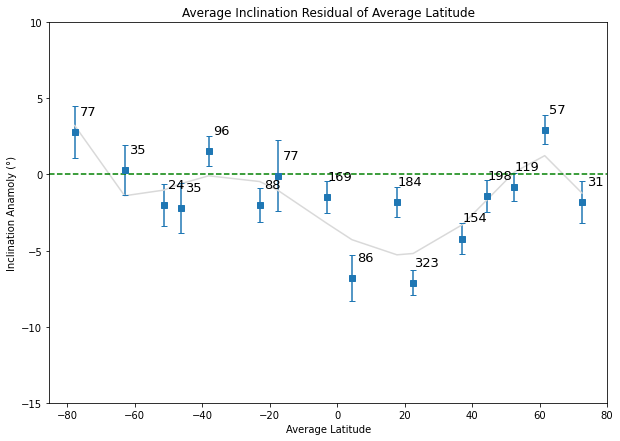

In [98]:
plt.figure(figsize=(10, 7))

plt.xlabel('Average Latitude')
plt.ylabel('Inclination Anamoly (°)') 
plt.title('Average Inclination Residual of Average Latitude')

xs = df_groups["AvgLat"]
ys = df_groups["new_ΔI"]
ls = pd.to_numeric(pd.Series(df_groups["GroupAmount"]))

plt.plot(xs, ys, '.r')

#zip joins x and y coordinates in pairs
for label, x, y in zip(ls, xs, ys):
    plt.annotate(label, (x,y), textcoords="offset points", xytext=(13,17), ha = 'center', fontsize=13)

#plt.plot(df_groups.AvgLat, df_groups["new_ΔI"], 'r^')

# curve fit
z = np.polyfit(xs, ys, 5)
zpoly = np.poly1d(z)
plt.plot(xs, zpoly(xs), c = '0.85')  

plt.errorbar(xs, ys, yerr = np.abs(df_groups['ΔIstdv_weighted']), fmt = 's', capsize=3)
plt.axhline(y=0, color='g', linestyle='--');
plt.ylim([-15, 10]);


This plot is being compared to:


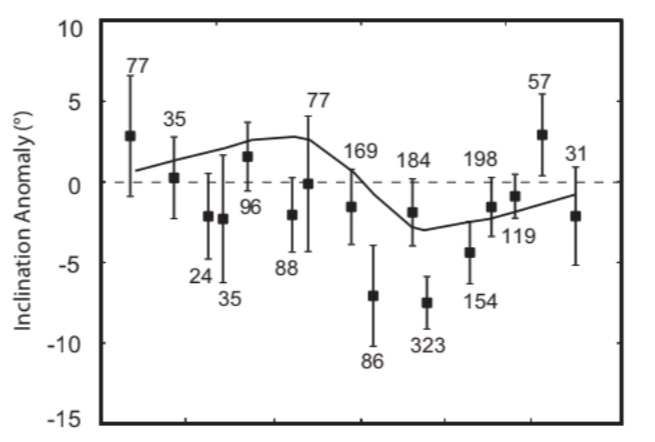

In [99]:
print('This plot is being compared to:')
Image(filename='IncAnamoly_8b_Cromwell.png')

### This plot depicts the average weighted residuals with weighted uncertainty. The group amounts are labeled for each point. The grey line is a curve of best fit. 

(-15.0, 10.0)

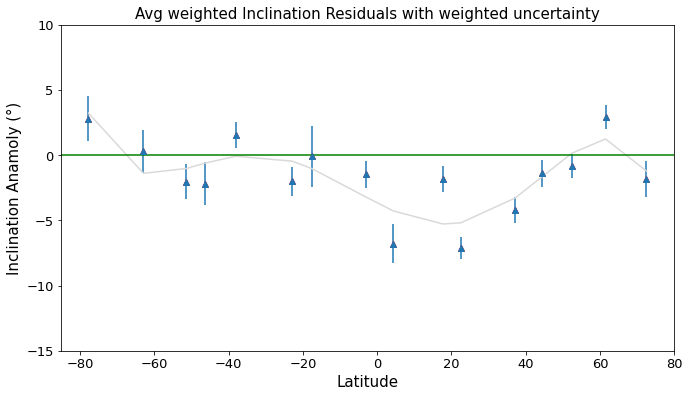

In [101]:
plt.figure(figsize=(11, 6))

plt.xlabel('Latitude', fontsize=15)
plt.ylabel('Inclination Anamoly (°)',fontsize=15) 
plt.title('Avg weighted Inclination Residuals with weighted uncertainty',fontsize=15)
plt.tick_params(axis='x',labelsize=13)
plt.tick_params(axis='y',labelsize=13)

xs = df_groups["AvgLat"]
ys = df_groups["new_ΔI"]
ls = pd.to_numeric(pd.Series(df_groups["GroupAmount"]))

plt.plot(xs, ys, 'r^')

z = np.polyfit(xs, ys, 5)
zpoly = np.poly1d(z)
plt.plot(xs, zpoly(xs), c = '0.85')   # curve fit

plt.errorbar(xs, ys, yerr = np.abs(df_groups['ΔIstdv_weighted']), fmt = '^')
plt.axhline(y=0, color='g')
plt.ylim([-15, 10])

#plt.savefig('../figs/' + 'psv_ma_10degbins_avgresidualsweighted_vs_latitude.png', dpi=150)

## Let this be the end of the notebook for the current purposes. 
All the plots below are to be edited once the inclination anamoly issue is resolved. 

# 

# 

This plot depicts the weighted average residuals with non-weighted uncertainty. 

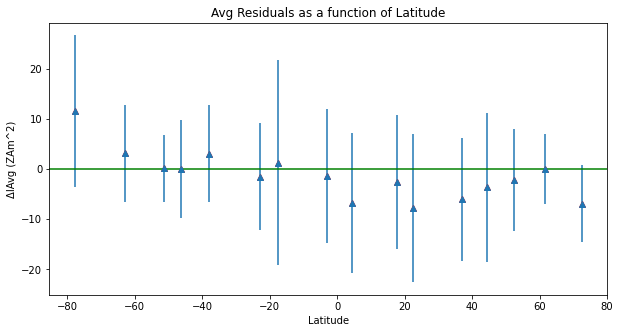

In [47]:
plt.figure(figsize=(10, 5))

plt.xlabel('Latitude')
plt.ylabel('ΔIAvg (ZAm^2)') 
plt.title('Avg Residuals as a function of Latitude')

plt.plot(df_groups.AvgLat, df_groups.ΔIAvg, 'r^')
plt.errorbar(df_groups.AvgLat, df_groups.ΔIAvg, yerr = np.abs(df_groups['ΔIstdv']), fmt = '^')
plt.axhline(y=0, color='g')

#plt.savefig('../figs/' + 'psvAvgResidualsVSlatitude.png', dpi=150)

### This plot depicts the Average inclination for the groups

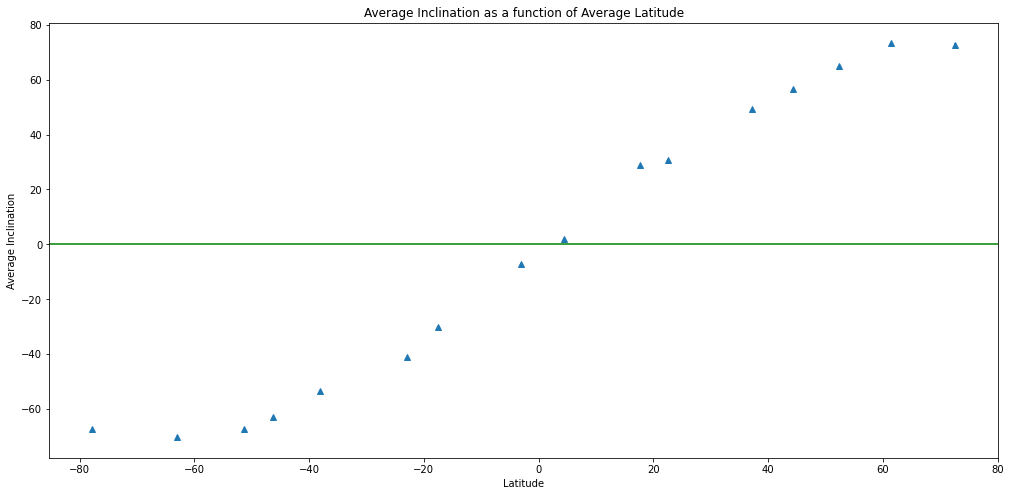

In [48]:
plt.figure(figsize=(17, 8))

plt.xlabel('Latitude')
plt.ylabel('Average Inclination') 
plt.title('Average Inclination as a function of Average Latitude')

plt.errorbar(df_groups.AvgLat, df_groups.AvgInc, yerr = df_groups["Istdvgroup_weighted"], fmt = '^')
plt.axhline(y=0, color='g')


# plt.savefig('../figs/' + 'AvgfieldVSavglatitude.png', dpi=150)

<ErrorbarContainer object of 3 artists>

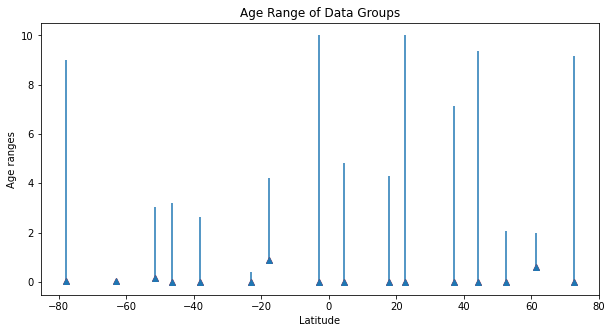

In [49]:
### This plot depicts the age range within each group
plt.figure(figsize=(10, 5))

plt.xlabel('Latitude')
plt.ylabel('Age ranges') 
plt.title('Age Range of Data Groups')

plt.plot(df_groups.AvgLat, df_groups["MinAge of Group"], 'r^')

lower_error = np.zeros(len(df_groups.AvgLat)) #adjusts for how many groups there are 
upper_error = df_groups["Age Range"]
asymmetric_error = [lower_error, upper_error]

plt.errorbar(df_groups.AvgLat, df_groups["MinAge of Group"], yerr = asymmetric_error, fmt = '^')
#plt.savefig('../figs/' + 'AgeRangeOfGroups.png', dpi=150)

### This plots the average locations for the PINT data, psv with 16 data bins, and psv with 34 data bins.

FileNotFoundError: [Errno 2] No such file or directory: 'psv_AvgGroups.pkl'

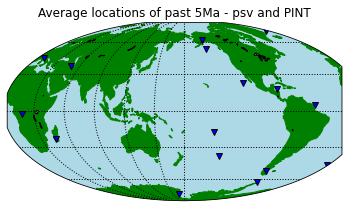

In [50]:
#avg locations 

ax = plt.axes(projection=ccrs.Mollweide(central_longitude=180))


gl=ax.gridlines(crs=ccrs.PlateCarree(),color='black',linewidth=1,linestyle='dotted')
gl.top_labels = False
gl.ylocator=mticker.FixedLocator(np.arange(-90,91,30))
gl.xlocator=mticker.FixedLocator(np.arange(0,400,30));
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

plt.title('Average locations of past 5Ma - psv and PINT')

ax.add_feature(OCEAN,color='lightblue')
ax.add_feature(LAND,color='green')
ax.add_feature(LAKES,facecolor='lightblue',edgecolor='black')
ax.plot([df_groups.AvgLong.values],[df_groups.AvgLat.values],marker='v',color='blue',\
        markersize=6,transform=ccrs.Geodetic(), markeredgecolor='black')

psv_34 = pd.read_pickle("psv_AvgGroups.pkl")

ax.plot([psv_34.AvgLong.values],[psv_34.AvgLat.values],marker='^',color='orange',\
        markersize=6,transform=ccrs.Geodetic(), markeredgecolor='black')

pintgroups = pd.read_pickle("PINT_AvgGroups.pkl")
 
ax.plot([pintgroups.AvgLong.values],[pintgroups.AvgLat.values],marker='o',color='red',\
        markersize=6,transform=ccrs.Geodetic(),markeredgecolor='black')

import matplotlib.patches as mpatches
psv_16 = mpatches.Patch(color='blue', label='psv_16')
psv_34 = mpatches.Patch(color='orange', label='psv_34')
PINT = mpatches.Patch(color='red', label='PINT')
plt.legend(handles=[psv_16,psv_34,PINT])

ax.set_global()

ax.coastlines();

#plt.savefig('../figs/' + 'psvboth-PINTavglocations5ma.png', dpi=150)

### This plots the average latitudes for the PINT data, psv with 16 data bins, and psv with 34 data bins

In [ ]:
#avg latitudes 

ax = plt.axes(projection=ccrs.Mollweide(central_longitude=180))


gl=ax.gridlines(crs=ccrs.PlateCarree(),color='black',linewidth=1,linestyle='dotted')
gl.top_labels = False
gl.ylocator=mticker.FixedLocator(np.arange(-90,91,30))
gl.xlocator=mticker.FixedLocator(np.arange(0,400,30));
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

plt.title('Average latitudes of past 5Ma - psv and PINT')

ax.add_feature(OCEAN,color='lightblue')
ax.add_feature(LAND,color='green')
ax.add_feature(LAKES,facecolor='lightblue',edgecolor='black')
ax.plot(180,[df_groups.AvgLat.values],marker='v',color='blue',\
        markersize=4,transform=ccrs.Geodetic())

psv_34 = pd.read_pickle("psv_AvgGroups.pkl")

ax.plot(180,[psv_34.AvgLat.values],marker='^',color='orange',\
        markersize=4,transform=ccrs.Geodetic())

pintgroups = pd.read_pickle("PINT_AvgGroups.pkl")
 
ax.plot(186,[pintgroups.AvgLat.values],marker='o',color='red',\
        markersize=4,transform=ccrs.Geodetic()) #,markeredgecolor='black')

import matplotlib.patches as mpatches
psv_16 = mpatches.Patch(color='blue', label='psv_16')
psv_34 = mpatches.Patch(color='orange', label='psv_34')
PINT = mpatches.Patch(color='red', label='PINT')
plt.legend(handles=[psv_16,psv_34,PINT])

ax.set_global()

ax.coastlines();

plt.savefig('../figs/' + 'psvboth-PINTavglats5ma.png', dpi=150)

### This table includes the weighted and non-weighted residuals for the groups

In [ ]:
data = df_groups.copy()

data["AvgLat"] = pd.to_numeric(data["AvgLat"]) #convert AvgLat values from dtype objects to float64 
data["AvgLong"] = pd.to_numeric(data["AvgLong"]) #convert AvgLong values from dtype objects to float64 

data["ResidualWeighted"] = data["ΔIAvg"]/data["ΔIstdvWeighted"] 
data["Residual"] = data["ΔIAvg"]/data["ΔIstdv"] 

data

### This creates a positive and negative weighted residual table to then plot on a location map with linear scaling. 

In [ ]:
import numpy as np 


data1 = data.copy()

data1["RW_rd"] = data1.ResidualWeighted  #copies the values from the ResidualsWeighted to a new column

# Rounds values in new RW_rd column to 1 decimal point
decimals = 1    
data1['RW_rd'] = data1['RW_rd'].apply(lambda x: round(x, decimals))

RW_pos = data1[data1.RW_rd >= 0] # new table only with data that has positive (greater than 0) residuals
RW_neg = data1[data1.RW_rd <= 0] # new table only with data that has negative (less than 0) residuals

RW_neg['RW_rd_abs'] = np.absolute(RW_neg.loc[:,('RW_rd')]) #takes abs value of negative residuals 


data2 = data.copy()

data2["R_rd"] = data2.Residual  #copies the values from the Residuals to a new column

# Rounds values in new R_rd column to 1 decimal point
decimals = 1    
data2['R_rd'] = data2['R_rd'].apply(lambda x: round(x, decimals))

R_pos = data2[data2.R_rd >= 0] # new table only with data that has positive (greater than 0) residuals
R_neg = data2[data2.R_rd <= 0] # new table only with data that has negative (less than 0) residuals

R_neg['R_rd_abs'] = np.absolute(R_neg['R_rd']) #takes abs value of negative residuals 
#R_pos
RW_neg

### Ranges of the plot

In [ ]:
import pygmt

region = [
    data.AvgLong.min() - 1,
    data.AvgLong.max() + 1,
    data.AvgLat.min() - 1,
    data.AvgLat.max() + 1,
]

print(region)
print(data.head())

In [ ]:
fig = pygmt.Figure()
fig.basemap(region=region, projection="M15c", frame=True)
fig.coast(land="black", water="skyblue")
fig.plot(x=data.AvgLong, y=data.AvgLat, style="c0.3c", color="white", pen="black")
fig.show()

### Weighted Residuals plot of psv with 16 data bins. 

In [ ]:
fig = pygmt.Figure()
fig.basemap(region=region, projection="M15c", frame=True)
fig.coast(land="white", water="skyblue")

fig.plot(
   x=RW_neg.AvgLong,
   y=RW_neg.AvgLat, 
   size=0.03 * (6*RW_neg.RW_rd_abs),
   style="cc",
   pen="1p,black") 

fig.plot(
   x=RW_pos.AvgLong,
   y=RW_pos.AvgLat, 
   size=0.03 * (6*RW_pos.RW_rd),
   style="+cc",
   pen="1p,black")

fig.basemap(frame=["a", '+t"Weighted Residuals of Avg locations psv_16"'])

fig.show()
fig.savefig('../figs/' + 'psv_16Wresidualscaling_all.png', dpi=160)

In [ ]:
# old grouping 

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)

avglat = []             # Average Latitude of group
avglong = []            # Average Longitude of group 
avgdec = []             # Average Declination of group
avginc = []             # Average Inclination of group 
avgincstdv = []         # Standard Deviation from the Inclination
degreefa = []           # Degrees from Average group location 
avgIgadgroups = []      # Average Calculated Igad 
groupcount = []         # Counts the number of data points within a group 
delIstdvs_weight = []   # Calculates the weighted ΔI stdv
delIstdv = []           # Calculates the non-weighted ΔI stdv
Istdvs_weight = []      # Calculates the weighted stdv for the group I stdv 
age_range = []          # Calculated the Max age - Min age of the group to give the age range
age_range_min = []      # Minimum age within a group
age_range_max = []      # Maximum age within a group
lat_min = []
lat_max = []

avgdel_I = []

startIndex = 0
endIndex = 0
length = len(df)
inc_col = df.columns.get_loc("Inc")
age_col = df.columns.get_loc("AGE")
dec_col = df.columns.get_loc("Dec")
lat_col = df.columns.get_loc("Model_lat")


X_col = df.columns.get_loc("X")
Z_col = df.columns.get_loc("Z")
X2_col = df.columns.get_loc("X2") # corresponds to x cartesian value for Dec and Inc
Z2_col = df.columns.get_loc("Z2") # corresponds to z cartesian value for Dec and Inc


del_I_col = df.columns.get_loc("\u0394I")
Igad_col = df.columns.get_loc("Igad")
Istdv_col = df.columns.get_loc("Istdv (Fisher)")
Inc_col = df.columns.get_loc("Inc")


for rowIndex, value in df.bins.items():
    
    if rowIndex == 0 or (value == df["bins"][rowIndex - 1] and endIndex != length - 1):   # This averages over rows with the same bins value
        endIndex += 1
        avglat.append('\/')
        avglong.append('\/')
        avgdec.append('\/')
        avginc.append('\/')
        avgincstdv.append('\/')
        avgIgadgroups.append('\/')
        groupcount.append('\/')
        delIstdvs_weight.append('\/')
        delIstdv.append('\/')
        Istdvs_weight.append('\/')
        age_range.append('\/')
        age_range_min.append('\/')
        age_range_max.append('\/')
        avgdel_I.append('\/')
        lat_min.append('\/')
        lat_max.append('\/')
          
    elif startIndex != endIndex:
        
        cartpos = df.iloc[startIndex:endIndex, X_col:Z_col+1]                # individual cartesian XYZ columns for lat and long for the length of a group
        avgcart = np.average(cartpos.values, axis=0)                           # averages over the XYZ cartesian columns 
                
        x1 = avgcart[0]                                                        # the average X value of lat and long for a group 
        y1 = avgcart[1]                                                        # the average Y of lat and long for a group
        z1 = avgcart[2]                                                        # the average Z of lat and long for a group
        
        lt = np.degrees(np.arcsin(z1))                                         # converts averaged cartesian location to latitude in degrees 
        lg = np.degrees(np.arctan2(y1,x1))                                     # converts averaged cartesian location to longitude in degrees      
       
        avglat.append(lt)                                                      # updates avglat column with the averaged latitude for a group 
        avglong.append(lg)                                                     # updates avglong column with the averaged longitude for a group 

        cartpos_DecInc = df.iloc[startIndex:endIndex, X2_col:Z2_col+1]       # individual cartesian XYZ columns for declination and inclination for the length of a group 
        avgcart_DecInc = np.average(cartpos_DecInc.values, axis=0)             # averages over the XYZ declination and inclination coumns
                
        x2 = avgcart_DecInc[0]                                                 # the average X value of dec and inc for a group
        y2 = avgcart_DecInc[1]                                                 # the average Y value of dec and inc for a group
        z2 = avgcart_DecInc[2]                                                 # the average Z value of dec and inc for a group
        
        inc = np.degrees(np.arcsin(z2))                                        # converts the averaged cartesian location to declination in degrees 
        dec = np.degrees(np.arctan2(y2,x2))                                    # converts the averaged cartesian location to inclination in degrees 
        
        avgdec.append(dec)                                                     # updates avgdec column with the averaged decliantion for a group
        avginc.append(inc)                                                     # updates avginc column with the averaged inclination for a group
        
        index = rowIndex - 1                                                   # group index 
        
        inclinationstdv = np.std(df.iloc[startIndex:endIndex, Inc_col])      # standard deviation over recorded (scalar) Inclinations for a group
        avgincstdv.append(inclinationstdv)                                     # updates avgincstdv with this standard deviation for a group 
        
        igadgroup = df.iloc[startIndex:endIndex, Igad_col]                   # calls the Igad column values for a group
        avgigad = np.average(igadgroup.values, axis=0)                         # averages over the Igad column for a group
        avgIgadgroups.append(avgigad)                                          # updates avgIgadgroups with this avgigad value
        
        groupcount.append(cartpos.shape[0])                                    # updates groupcount with length of the cartpos to give the amount of data within a group
        
        Icalculatedgroup = df.iloc[startIndex:endIndex, Istdv_col]           # calls the I stdv col for a group from: df["I stdv"] = 81/np.sqrt(np.abs(df["K"]))  
     
        Istdvgroup_weighted = np.std(Icalculatedgroup) / np.sqrt(cartpos.shape[0])    # the standard deviation of I stdv divided by N, amount of data points in group 
        Istdvs_weight.append(Istdvgroup_weighted)                                     # updates the Istdvs_weight with this Istdvgroup_weighted standard deviation            

        
        delIcalculatedgroup = df.iloc[startIndex:endIndex, del_I_col]               # calls the ΔI column from: df["\u0394I"] =  ((df["Inc"]) - df["Igad"])

        delIstdvgroup = np.std(delIcalculatedgroup)                                         # non-weighted ΔI stdv
        delIstdv.append(delIstdvgroup)                                                      # updates delIstdv with delIstdvgroup_weighted stdv
                
        delIstdvgroup_weighted = (np.std(delIcalculatedgroup)) / np.sqrt(cartpos.shape[0])  # weighted ΔI stdv = stdv of ΔI for a group divided by N
        delIstdvs_weight.append(delIstdvgroup_weighted)                                     # updates delIstdv_weight with the weighted stdv, delIstdvgroup_weighted
        
        
        del_I_calcgroupavg = np.average(delIcalculatedgroup.values, axis=0)                 # average of the non-weighted ΔI stdv
        avgdel_I.append(del_I_calcgroupavg)                                                 # updates avgdel_I with averages, del_I_calcgroupavg
        
        agegroup = df.iloc[startIndex:endIndex, age_col]                                  # calls the age column for a group
        age_range_calc = (max(agegroup) - min(agegroup))                                    # subtract the min within the age column for a group from the max to give the age 
        age_range.append(age_range_calc)            #updates age_range with this value      #   range of a group
                                        
        age_range_mincal = min(agegroup)                                                    # minimum of an age range for a group
        age_range_min.append(age_range_mincal)                                              # updates age_range_min with this minimum age 
        
        age_range_maxcal = max(agegroup)                                                    # maximum of an age range for a group
        age_range_max.append(age_range_maxcal)                                              # updates age_range_max with this maximum age
        
        latgroup = df.iloc[startIndex:endIndex, lat_col]                                  # calls the lat column for a group
        lat_mincal = min(latgroup)
        lat_maxcal = max(latgroup)
        lat_min.append(lat_mincal)
        lat_max.append(lat_maxcal)
               
        while index >= 0 and avglat[index] == '\/':                                         # indexes the newly created columns with their respective input values
            avglat[index] = lt
            avglong[index] = lg
            avgdec[index] = dec
            avginc[index] = inc
            avgincstdv[index] = inclinationstdv
            avgIgadgroups[index] = avgigad
            groupcount[index] = cartpos.shape[0]
            delIstdvs_weight[index] = delIstdvgroup_weighted
            delIstdv[index] = delIstdvgroup
            Istdvs_weight[index] = Istdvgroup_weighted
            age_range[index] = age_range_calc
            age_range_min[index] = age_range_mincal
            age_range_max[index] = age_range_maxcal
            lat_min[index] = lat_mincal
            lat_max[index] = lat_maxcal
            
            avgdel_I[index] = del_I_calcgroupavg
            
            index -= 1
        
        startIndex = rowIndex + 1                                                         # does so for the length of a group
        endIndex = startIndex
        
    else: 
        avglat.append('0')
        avglong.append('0')
        avgdec.append('0')
        avginc.append('0')
        avgincstdv.append('0')
        avgIgadgroups.append('0')
        groupcount.append('0')
        delIstdvs_weight.append('0')
        delIstdv.append('0')
        Istdvs_weight.append('0')
        age_range.append('0')
        age_range_min.append('0')
        age_range_max.append('0')
        
        avgdel_I.append('0')
        lat_min.append('0')
        lat_max.append('0')
        
        
        startIndex = rowIndex + 1
        endIndex = startIndex

df["AvgLat"] = pd.Series(avglat)         # Avg latitude of a group 
df["AvgLong"] = pd.Series(avglong)       # Avg longitude of a group 
 
df["AvgDec"] = pd.Series(avgdec)         # Avg Declination of a group 
df["AvgInc"] = pd.Series(avginc)         # Avg Inclination of a group 
df["AvgIStdv (Scalar)"] = pd.Series(avgincstdv)   # Avg stdv of I of a group 


# Find the Degrees from the calculated Avgerage location (avglat and avglong) for each data point 
# Converting to cartesian then taking the dot between the original location and avg location

latra = np.radians(df.AvgLat.astype(float))
longra = np.radians(df.AvgLong.astype(float))

df['X_a']= np.cos(latra)*np.cos(longra)         # cartesian X value of average latitude and longitude for a group 
df['Y_a']= np.cos(latra)*np.sin(longra)         # cartesian Y value of average latitude and longitude for a group
df['Z_a']= np.sin(latra)                        # cartesian Z value of average latitude and longitude for a group
 
X_a_col = df.columns.get_loc("X_a")
Z_a_col = df.columns.get_loc("Z_a")+1

SSavgarr = df.iloc[:, X_a_col:Z_a_col].values   # array of all X_a,Y_a, Z_a

for row in range(len(SSavgarr)):
    a = (apsvnewn[row,:])                      # array of X_a,Y_a, Z_a
    b = (SSavgarr[row,:])                       # array of X, Y, Z
    d = np.dot(a,b)
    
    if 1.000000 <= d <= 1.2:
        d = 1.00
    
    degreefa.append(np.degrees(np.arccos(d)))   # updates degreefa with the calculated degrees from average location

df["DegreeFmAvg"] = pd.Series(degreefa)

df["IStdvWeighted"] = pd.Series(Istdvs_weight)
df["ΔIstdv"] = pd.Series(delIstdv)
df["ΔIstdvWeighted"] = pd.Series(delIstdvs_weight)
df["AvgIgad"] = pd.Series(avgIgadgroups)
df["GroupAmount"] = pd.Series(groupcount)
df["Binlow"] = pd.Series(lat_min)
df["Binhigh"] = pd.Series(lat_max)
df["ΔIAvg"] = pd.Series(avgdel_I)
df["AgeRange"] = pd.Series(age_range)
df["MinAge of Group"] = pd.Series(age_range_min)
df["MaxAge of Group"] = pd.Series(age_range_max)

SS_avgs = df
SS_avgs